In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/credit-risk-loan-eliginility/train_split.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("../input/credit-risk-loan-eliginility/train_split.csv")

In [4]:
df.shape

(63999, 45)

In [5]:
df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0


In [6]:
#checking for missing values in all columns
df.isnull().sum()

member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
batch_enrolled                 10264
int_rate                           0
grade                              0
sub_grade                          0
emp_title                       3826
emp_length                      3324
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
desc                           54849
purpose                            0
title                             13
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq         32831
mths_since_last_record         54349
open_acc                           0
pub_rec                            0
r

In [7]:
# Removing columns with less significace
#funded_amnt                        
#funded_amnt_inv 
#member_id 
#batch_enrolled
#emp_title
#sub_grade 
#zip_code 


In [8]:

df=df.drop(['funded_amnt','funded_amnt_inv','member_id','batch_enrolled','emp_title','sub_grade','zip_code'],axis=1)

In [9]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,36 months,19.19,E,9 years,OWN,28700.0,Source Verified,n,NaN,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,4800,36 months,10.99,B,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,10000,36 months,7.26,A,2 years,OWN,45000.0,Not Verified,n,NaN,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,15000,36 months,19.72,D,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,16000,36 months,10.64,B,10+ years,RENT,52000.0,Verified,n,NaN,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0


In [10]:
#more columns that we can get rid of that will not effect much.It is always better to have less confusing data

In [12]:
df=df.drop(['recoveries','collection_recovery_fee','total_rec_int','total_rec_late_fee','tot_coll_amt',],axis=1)

In [13]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,...,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,36 months,19.19,E,9 years,OWN,28700.0,Source Verified,n,NaN,...,f,0.0,74.0,INDIVIDUAL,NaN,26th week,0,28699.0,30800.0,0
1,4800,36 months,10.99,B,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,...,w,0.0,NaN,INDIVIDUAL,NaN,9th week,0,9974.0,32900.0,0
2,10000,36 months,7.26,A,2 years,OWN,45000.0,Not Verified,n,NaN,...,w,0.0,NaN,INDIVIDUAL,NaN,9th week,0,38295.0,34900.0,0
3,15000,36 months,19.72,D,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,...,f,0.0,NaN,INDIVIDUAL,NaN,135th week,0,55564.0,24700.0,0
4,16000,36 months,10.64,B,10+ years,RENT,52000.0,Verified,n,NaN,...,w,0.0,NaN,INDIVIDUAL,NaN,96th week,0,47159.0,47033.0,0


In [14]:
df.isnull().sum()

loan_amnt                          0
term                               0
int_rate                           0
grade                              0
emp_length                      3324
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
desc                           54849
purpose                            0
title                             13
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq         32831
mths_since_last_record         54349
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                        29
total_acc                          0
initial_list_status                0
collections_12_mths_ex_med         8
mths_since_last_major_derog    48155
application_type                   0
v

In [15]:
#drop columns with high missing value
df=df.drop(['verification_status_joint','mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq','desc'],axis=1)

In [16]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,36 months,19.19,E,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,...,73.1,28,f,0.0,INDIVIDUAL,26th week,0,28699.0,30800.0,0
1,4800,36 months,10.99,B,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,...,23.2,13,w,0.0,INDIVIDUAL,9th week,0,9974.0,32900.0,0
2,10000,36 months,7.26,A,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,...,31.2,19,w,0.0,INDIVIDUAL,9th week,0,38295.0,34900.0,0
3,15000,36 months,19.72,D,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,...,55.5,21,f,0.0,INDIVIDUAL,135th week,0,55564.0,24700.0,0
4,16000,36 months,10.64,B,10+ years,RENT,52000.0,Verified,n,credit_card,...,76.2,27,w,0.0,INDIVIDUAL,96th week,0,47159.0,47033.0,0


In [17]:
df.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
grade                            0
emp_length                    3324
home_ownership                   0
annual_inc                       0
verification_status              0
pymnt_plan                       0
purpose                          0
title                           13
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      29
total_acc                        0
initial_list_status              0
collections_12_mths_ex_med       8
application_type                 0
last_week_pay                    0
acc_now_delinq                   0
tot_cur_bal                   5124
total_rev_hi_lim              5124
loan_status                      0
dtype: int64

In [18]:
df.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,loan_status
count,63999.000000,63999.000000,6.399900e+04,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,6.399900e+04,63970.000000,63999.000000,63991.000000,63999.000000,5.887500e+04,5.887500e+04,63999.000000
mean,14780.448913,13.242932,7.493590e+04,18.178367,0.317036,0.701917,11.580572,0.189425,1.697358e+04,55.045863,25.278067,0.015080,0.005406,1.398125e+05,3.222392e+04,0.237457
std,8406.762266,4.366605,5.442621e+04,8.270375,0.868051,1.007678,5.338304,0.551946,2.207474e+04,23.829857,11.859784,0.132914,0.079858,1.525187e+05,3.237944e+04,0.425528
min,500.000000,5.320000,4.800000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,9.990000,4.500000e+04,11.960000,0.000000,0.000000,8.000000,0.000000,6.480000e+03,37.800000,17.000000,0.000000,0.000000,3.020050e+04,1.410000e+04,0.000000
50%,13000.000000,12.990000,6.450000e+04,17.690000,0.000000,0.000000,11.000000,0.000000,1.193100e+04,55.900000,24.000000,0.000000,0.000000,8.069100e+04,2.390000e+04,0.000000
75%,20000.000000,16.200000,9.000000e+04,24.010000,0.000000,1.000000,14.000000,0.000000,2.088100e+04,73.500000,32.000000,0.000000,0.000000,2.088130e+05,4.020000e+04,0.000000
max,35000.000000,28.990000,3.964280e+06,72.300000,27.000000,28.000000,70.000000,28.000000,1.190046e+06,152.700000,112.000000,4.000000,4.000000,2.482331e+06,1.314900e+06,1.000000


In [19]:
print(list(df.columns))

['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'collections_12_mths_ex_med', 'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']


In [21]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

In [22]:

#checking for corelations
corr=df.corr()

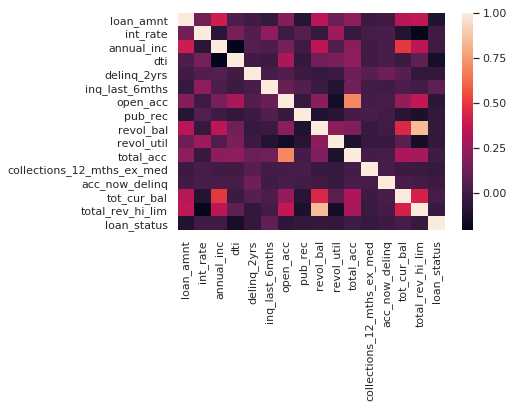

In [23]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [24]:
#Data Expploration of target values
y=df['loan_status']

In [25]:
y.value_counts()

0    48802
1    15197
Name: loan_status, dtype: int64

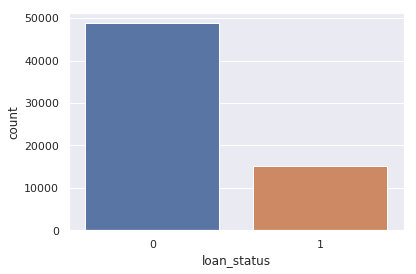

In [26]:
ax = sns.countplot(x="loan_status", data=df)

In [27]:
count_0 = len(df[df['loan_status']== 0])
count_1 = len(df[df['loan_status']==1])
pct_of_0 = count_0/(count_1+count_0)
print("percentage of 0 are", pct_of_0*100)
pct_of_1 = count_1/(count_1+count_0)
print("percentage of 1 are", pct_of_1*100)

percentage of 0 are 76.2543164736949
percentage of 1 are 23.745683526305097


In [28]:
#most of the loan status are 0
df.groupby('loan_status').mean()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim
loan_status,,,,,,,,,,,,,,,
0,15240.472727,13.239726,75105.984617,18.798434,0.338675,0.652145,11.774292,0.204029,17486.816626,55.679896,25.292672,0.017808,0.006024,138457.583262,32648.051241
1,13303.178259,13.253228,74389.728123,16.187154,0.247549,0.861749,10.958479,0.142528,15325.422649,53.009602,25.231164,0.006319,0.003422,145618.514991,30406.524596


In [29]:
df.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
grade                            0
emp_length                    3324
home_ownership                   0
annual_inc                       0
verification_status              0
pymnt_plan                       0
purpose                          0
title                           13
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      29
total_acc                        0
initial_list_status              0
collections_12_mths_ex_med       8
application_type                 0
last_week_pay                    0
acc_now_delinq                   0
tot_cur_bal                   5124
total_rev_hi_lim              5124
loan_status                      0
dtype: int64

In [30]:
#removing more than 1% missing values and 29 rows from revol_util
df=df.drop(['tot_cur_bal','total_rev_hi_lim'],axis=1)


In [31]:
df=df.dropna()

In [32]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status
0,14350,36 months,19.19,E,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,...,1,22515,73.1,28,f,0.0,INDIVIDUAL,26th week,0,0
1,4800,36 months,10.99,B,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,...,0,7624,23.2,13,w,0.0,INDIVIDUAL,9th week,0,0
2,10000,36 months,7.26,A,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,...,0,10877,31.2,19,w,0.0,INDIVIDUAL,9th week,0,0
3,15000,36 months,19.72,D,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,...,0,13712,55.5,21,f,0.0,INDIVIDUAL,135th week,0,0
4,16000,36 months,10.64,B,10+ years,RENT,52000.0,Verified,n,credit_card,...,0,35835,76.2,27,w,0.0,INDIVIDUAL,96th week,0,0


In [33]:
df.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
initial_list_status            object
collections_12_mths_ex_med    float64
application_type               object
last_week_pay                  object
acc_now_delinq                  int64
loan_status                     int64
dtype: objec

In [34]:
#categorical variables are- term,grade
#home_ownership,veri_status,addr state,application type,lastweek pay
col_obj=df[['home_ownership','grade','verification_status','addr_state','initial_list_status','last_week_pay',]]
for i in col_obj:
     
        print(col_obj[i].value_counts())

MORTGAGE    30403
RENT        24558
OWN          5652
OTHER          13
NONE            2
ANY             1
Name: home_ownership, dtype: int64
B    17484
C    16891
A    10149
D     9406
E     4767
F     1580
G      352
Name: grade, dtype: int64
Source Verified    23096
Not Verified       18821
Verified           18712
Name: verification_status, dtype: int64
CA    8896
NY    5034
TX    4856
FL    4064
IL    2437
NJ    2326
PA    2139
OH    2057
VA    1868
GA    1866
NC    1643
MI    1550
MA    1452
MD    1447
AZ    1382
CO    1299
WA    1295
MN    1124
MO    1005
IN     953
CT     927
TN     901
NV     871
AL     799
WI     798
OR     736
LA     728
SC     707
KY     575
KS     545
OK     521
AR     447
UT     407
NM     340
NH     309
WV     296
RI     289
HI     266
MS     256
MT     180
DE     177
DC     167
AK     162
WY     147
VT     120
SD     107
NE      83
ME      38
ND      35
IA       1
ID       1
Name: addr_state, dtype: int64
f    31138
w    29491
Name: initial_list_status

In [35]:
df.title.value_counts()

Debt consolidation         28355
Credit card refinancing    11139
Home improvement            2653
Other                       2071
Debt Consolidation          1188
                           ...  
Consolidate and Payoff         1
debtrelief/homeimpr            1
CCR-loan                       1
buying a new computer          1
Credit Cards Begone            1
Name: title, Length: 6171, dtype: int64

In [36]:
df.emp_length.value_counts()

10+ years    20950
2 years       5688
< 1 year      5087
3 years       4978
1 year        4082
5 years       4021
4 years       3758
7 years       3283
8 years       3176
6 years       3118
9 years       2488
Name: emp_length, dtype: int64

In [37]:
df.purpose.value_counts()

debt_consolidation    36156
credit_card           13986
home_improvement       3470
other                  2841
major_purchase         1156
small_business          735
car                     585
medical                 580
moving                  388
vacation                319
house                   192
wedding                 173
renewable_energy         26
educational              22
Name: purpose, dtype: int64

In [38]:
#let us get rid of title and addr state
df=df.drop(['title','addr_state'],axis=1)

In [39]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status
0,14350,36 months,19.19,E,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,...,1,22515,73.1,28,f,0.0,INDIVIDUAL,26th week,0,0
1,4800,36 months,10.99,B,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,...,0,7624,23.2,13,w,0.0,INDIVIDUAL,9th week,0,0
2,10000,36 months,7.26,A,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,...,0,10877,31.2,19,w,0.0,INDIVIDUAL,9th week,0,0
3,15000,36 months,19.72,D,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,...,0,13712,55.5,21,f,0.0,INDIVIDUAL,135th week,0,0
4,16000,36 months,10.64,B,10+ years,RENT,52000.0,Verified,n,credit_card,...,0,35835,76.2,27,w,0.0,INDIVIDUAL,96th week,0,0


In [40]:
#ordinal value
#emp length is a categorical value which can be converted into numerical value
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}

In [41]:
df = df.replace(mapping_dict)


In [42]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status
0,14350,36 months,19.19,5,9,OWN,28700.0,Source Verified,n,debt_consolidation,...,1,22515,73.1,28,f,0.0,INDIVIDUAL,26th week,0,0
1,4800,36 months,10.99,2,0,MORTGAGE,65000.0,Source Verified,n,home_improvement,...,0,7624,23.2,13,w,0.0,INDIVIDUAL,9th week,0,0
2,10000,36 months,7.26,1,2,OWN,45000.0,Not Verified,n,debt_consolidation,...,0,10877,31.2,19,w,0.0,INDIVIDUAL,9th week,0,0
3,15000,36 months,19.72,4,10,RENT,105000.0,Not Verified,n,debt_consolidation,...,0,13712,55.5,21,f,0.0,INDIVIDUAL,135th week,0,0
4,16000,36 months,10.64,2,10,RENT,52000.0,Verified,n,credit_card,...,0,35835,76.2,27,w,0.0,INDIVIDUAL,96th week,0,0


In [43]:
df.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                           int64
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
initial_list_status            object
collections_12_mths_ex_med    float64
application_type               object
last_week_pay                  object
acc_now_delinq                  int64
loan_status                     int64
dtype: object

In [44]:
#changing rest of nominal values to numeric 
nominal_columns = ["home_ownership", "verification_status", "purpose", "term","initial_list_status","application_type","last_week_pay"]
dummy_df = pd.get_dummies(df[nominal_columns])
df1 = pd.concat([df, dummy_df], axis=1)
df1 = df1.drop(nominal_columns, axis=1)

In [45]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status
0,14350,36 months,19.19,5,9,OWN,28700.0,Source Verified,n,debt_consolidation,...,1,22515,73.1,28,f,0.0,INDIVIDUAL,26th week,0,0
1,4800,36 months,10.99,2,0,MORTGAGE,65000.0,Source Verified,n,home_improvement,...,0,7624,23.2,13,w,0.0,INDIVIDUAL,9th week,0,0
2,10000,36 months,7.26,1,2,OWN,45000.0,Not Verified,n,debt_consolidation,...,0,10877,31.2,19,w,0.0,INDIVIDUAL,9th week,0,0
3,15000,36 months,19.72,4,10,RENT,105000.0,Not Verified,n,debt_consolidation,...,0,13712,55.5,21,f,0.0,INDIVIDUAL,135th week,0,0
4,16000,36 months,10.64,2,10,RENT,52000.0,Verified,n,credit_card,...,0,35835,76.2,27,w,0.0,INDIVIDUAL,96th week,0,0


In [46]:
df1=df1.drop(['pymnt_plan'],axis=1)

In [47]:
df1.head()

,loan_amnt,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,last_week_pay_82th week,last_week_pay_83th week,last_week_pay_87th week,last_week_pay_8th week,last_week_pay_91th week,last_week_pay_92th week,last_week_pay_95th week,last_week_pay_96th week,last_week_pay_9th week,last_week_pay_NAth week
0,14350,19.19,5,9,28700.0,33.88,0,1,14,1,...,0,0,0,0,0,0,0,0,0,0
1,4800,10.99,2,0,65000.0,3.64,0,1,6,0,...,0,0,0,0,0,0,0,0,1,0
2,10000,7.26,1,2,45000.0,18.42,0,0,5,0,...,0,0,0,0,0,0,0,0,1,0
3,15000,19.72,4,10,105000.0,14.97,0,2,10,0,...,0,0,0,0,0,0,0,0,0,0
4,16000,10.64,2,10,52000.0,20.16,0,0,11,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df1.columns

Index(['loan_amnt', 'int_rate', 'grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       ...
       'last_week_pay_82th week', 'last_week_pay_83th week',
       'last_week_pay_87th week', 'last_week_pay_8th week',
       'last_week_pay_91th week', 'last_week_pay_92th week',
       'last_week_pay_95th week', 'last_week_pay_96th week',
       'last_week_pay_9th week', 'last_week_pay_NAth week'],
      dtype='object', length=132)

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
y=df1.loan_status

In [51]:
x=df1.drop('loan_status',axis=1)

In [52]:
x.head()

,loan_amnt,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,last_week_pay_82th week,last_week_pay_83th week,last_week_pay_87th week,last_week_pay_8th week,last_week_pay_91th week,last_week_pay_92th week,last_week_pay_95th week,last_week_pay_96th week,last_week_pay_9th week,last_week_pay_NAth week
0,14350,19.19,5,9,28700.0,33.88,0,1,14,1,...,0,0,0,0,0,0,0,0,0,0
1,4800,10.99,2,0,65000.0,3.64,0,1,6,0,...,0,0,0,0,0,0,0,0,1,0
2,10000,7.26,1,2,45000.0,18.42,0,0,5,0,...,0,0,0,0,0,0,0,0,1,0
3,15000,19.72,4,10,105000.0,14.97,0,2,10,0,...,0,0,0,0,0,0,0,0,0,0
4,16000,10.64,2,10,52000.0,20.16,0,0,11,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [54]:
x_train.shape

(48503, 131)

In [55]:
x_test.shape

(12126, 131)

In [56]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier

In [57]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [58]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred=clf.predict(x_test)

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8039749299026885


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
rfc_cv_score = cross_val_score(clf, x, y, cv=10, scoring='roc_auc')

In [63]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[8951  169]
 [2208  798]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      9120
           1       0.83      0.27      0.40      3006

    accuracy                           0.80     12126
   macro avg       0.81      0.62      0.64     12126
weighted avg       0.81      0.80      0.76     12126



=== All AUC Scores ===
[0.79646792 0.79952334 0.79953195 0.80473326 0.79120379 0.78614982
 0.78776759 0.79774179 0.78246868 0.7889498 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7934537946922716


In [64]:
y_test.head()

60784    0
62147    0
59730    1
45073    0
21065    0
Name: loan_status, dtype: int64

In [65]:
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [66]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

dti                            7.506694e-02
int_rate                       7.130913e-02
revol_util                     6.701354e-02
revol_bal                      6.607822e-02
annual_inc                     6.026930e-02
                                   ...     
application_type_JOINT         8.933235e-06
application_type_INDIVIDUAL    7.369914e-06
home_ownership_NONE            4.631448e-06
home_ownership_ANY             3.793247e-07
last_week_pay_257th week       0.000000e+00
Length: 131, dtype: float64

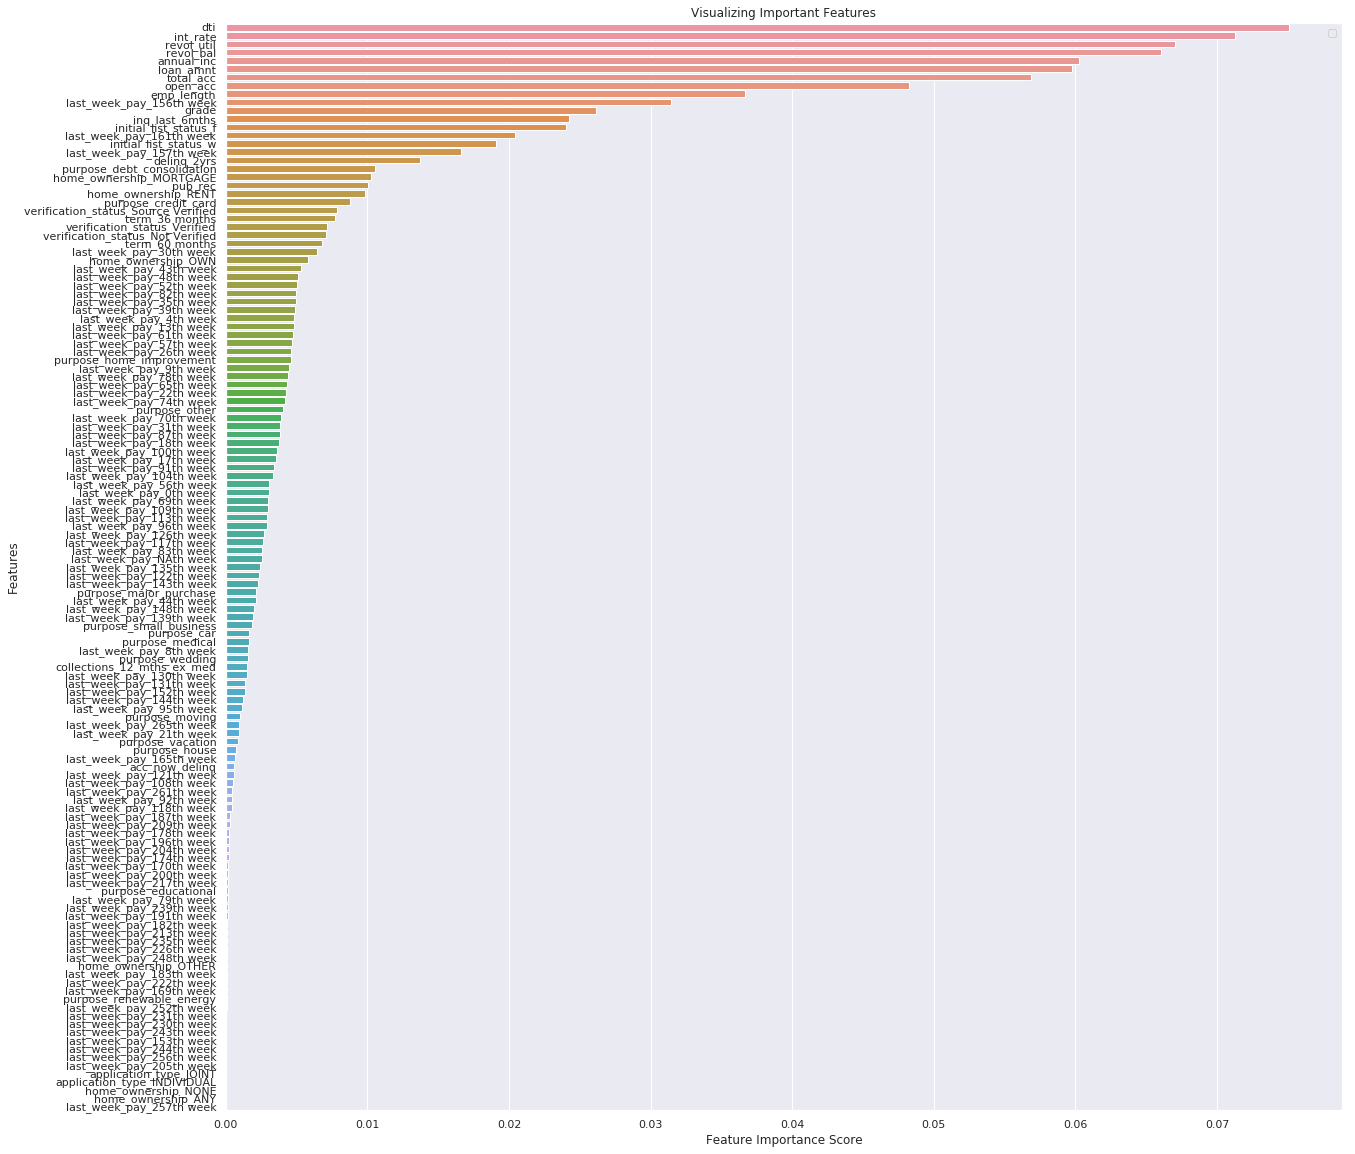

In [67]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,20))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
